<a href="https://colab.research.google.com/github/JD950/Python-Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!ls

sample_data


In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv', header=0)
data.tail(30)

df = data.iloc[:, [1,2,5,6,9]]
df.head()

,diagnosis,radius_mean,area_mean,smoothness_mean,concave points_mean
0,M,17.99,1001.0,0.11840,0.14710
1,M,20.57,1326.0,0.08474,0.07017
2,M,19.69,1203.0,0.10960,0.12790
3,M,11.42,386.1,0.14250,0.10520
4,M,20.29,1297.0,0.10030,0.10430


In [3]:
y = df.pop('diagnosis') # REMOVE the feature from df and put into y 
x = df
# y = f(x) -> equation for DTree 
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [4]:
# Decision Tree, Random Forest -> work on relative comparison -> NORMALIZING or NOT normalizing
# may not cause any diff at all 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree_light =  DecisionTreeClassifier(max_depth=3)
dtree_deep =  DecisionTreeClassifier(max_depth=10)
dtree.fit(xtrain, ytrain)
dtree_light.fit(xtrain, ytrain)
dtree_deep.fit(xtrain, ytrain)
# WEIGHTS and BIASES, y = Weights * inputs + bias -> MACHINE LEARNING
# Decision TREE doesn't help with calculating the above! 
# it helps finding thresholds within which features take decisions 


DecisionTreeClassifier(max_depth=10)

In [5]:
pred1 = dtree.predict(xtest)
pred2 = dtree_light.predict(xtest)
pred3 = dtree_deep.predict(xtest)
from sklearn.metrics import accuracy_score
# COMPARING the TREES to each other, not to the actual answer (ytest)
score = accuracy_score(pred1, pred2)
print(score)
score = accuracy_score(pred1, pred3)
print(score)
score = accuracy_score(pred3, pred2)
print(score)
# ACCURACY_SCORE(a, b) = (len(any) - mismatches) / len(any)

0.9824561403508771
0.956140350877193
0.956140350877193


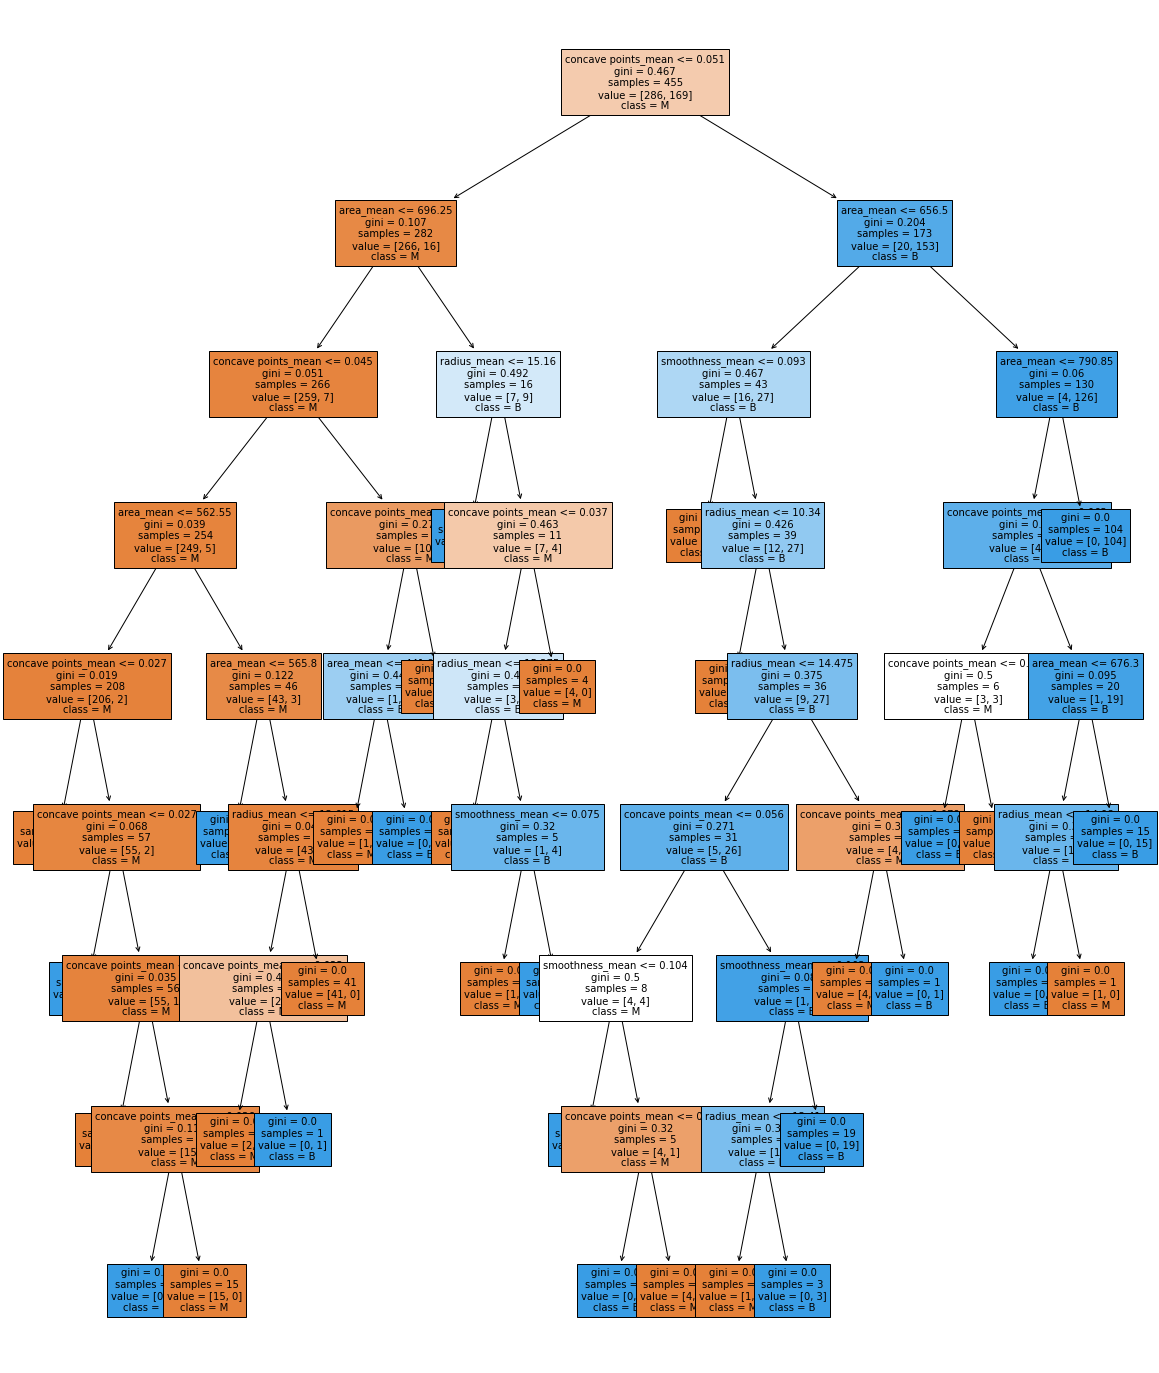

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,25))
a = plot_tree(dtree_deep, feature_names=x.columns, fontsize=10, filled=True, class_names=['M','B'])
plt.show()
# GINI and ENTROPY 